#Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
import warnings
warnings.simplefilter("ignore")

#Data

(V, Q, Q_r, S_i, dS, TS_i, dTS, N_i, dN, M, DO, i, Sig/TS, Sig, TKN, X, Th, Th_c, Th_n, Th_cn)

In [ ]:
df = pd.read_csv('/content/ASP_Data.csv')
df.head(3)

,Unnamed: 0,V,Si,So,TSi,TSo,Ni,No,TKNi,TKNo,...,Sig,Q,Th_c,Th,dS,dTS,dN,TKN,Thn,Th_cn
0,0,4512.0,239,30,293,18,56,12,150,35,...,185,2324.09,10.36,8.67,209,275,44,115,2.1675,15.987772
1,1,4188.0,280,33,344,15,57,12,159,38,...,217,2260.14,8.08,8.27,247,329,45,121,2.0675,10.833437
2,2,4116.0,256,30,301,14,56,12,139,31,...,190,2488.85,8.82,7.74,226,287,44,108,1.9350,12.707342


In [ ]:
psi_1 = 0.8
psi_2 = 0.2

#C-BOD Removal Regression 1

In [ ]:
df1 = pd.DataFrame()

df1['y'] = df['V']*df['M']/(2*df['Q']*df['dS']*df['dTS'])
df1['x1'] = 2*df['Q']/(df['Sig']*df['V'])
df1['x2'] = 1/df['Sig']

df1.head(3)

,y,x1,x2
0,0.065530,0.005569,0.005405
1,0.042036,0.004974,0.004608
2,0.051006,0.006365,0.005263


In [ ]:
y1 = df1['y']
x1 = df1.drop(['y'], axis = 1)

In [ ]:
df1.corr()

,y,x1,x2
y,1.000000,0.367710,0.730308
x1,0.367710,1.000000,0.791569
x2,0.730308,0.791569,1.000000


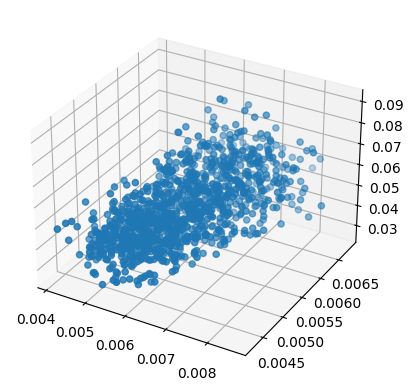

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df1['x1'], df1['x2'], df1['y'])
plt.show()

In [ ]:
LR1 = LinearRegression(fit_intercept = False)
LR1.fit(x1, y1)

LinearRegression(fit_intercept=False)

###Equation

In [ ]:
coeff = LR1.coef_
itcept = LR1.intercept_

a = coeff[0]
b = coeff[1]

print(f'y = ({a:.2e}).x1 + ({b:.3f}).x2')

y = (-7.92e+00).x1 + (18.416).x2


In [ ]:
y1_pred = LR1.predict(x1)
r21 = r2_score(y1, y1_pred)
r21

0.5686266404769325

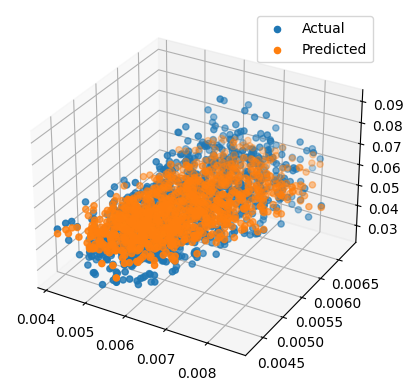

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df1['x1'], df1['x2'], df1['y'], label = "Actual")
axes.scatter(df1['x1'], df1['x2'], LR1.predict(x1), label = "Predicted")
axes.legend()
plt.show()

###Constants

In [ ]:
c = a/b
# a = Ks/((psi1**2)*k*Kd)
# b = (1 - Ks)/(psi1*k)

#C-BOD Removal Regression 2

In [ ]:
df2 = pd.DataFrame()

df2['y'] = 2*a*df['Q']/(b*df['V']) + 1
df2['x'] = df['Th_c']

# df2['x1'] = df['Th_c']
# df2['x2'] = df['Th_c']**2
# df2['y'] = 2*a*df['Q']/(b*df['V']) + 1

df2.head(3)

,y,x
0,0.556808,10.36
1,0.535659,8.08
2,0.479726,8.82


In [ ]:
y2 = df2['y']
x2 = df2.drop(['y'], axis = 1)

# x21 = df2['x1']
# x22 = df2['x2']

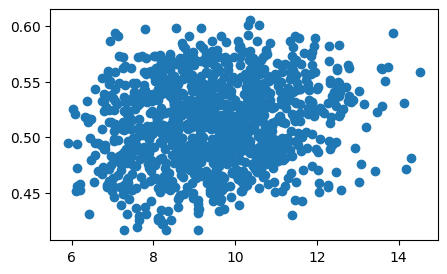

In [ ]:
plt.figure(figsize = (5, 3))
plt.scatter(x2, y2)
plt.show()

# fig = plt.figure()
# axes = fig.add_subplot(111, projection='3d')
# axes.scatter(df2['x1'], df2['x2'], df2['y'])
# plt.show()

In [ ]:
def func2(x, a2, b2):
  # x21, x22 = x
  # return a2*x21 + b2*x22
  return a2*x + b2*(x**2)

In [ ]:
# ind_vars = np.vstack((x21, x22))
# popt2, pcov2 = curve_fit(func2, ind_vars, df2['y'])

popt2, pcov2 = curve_fit(func2, df2['x'], df2['y'])


a2 = popt2[0]
b2 = popt2[1]

###Equation

In [ ]:
print(f'y = ({a2:.2e}).x + ({b2:.2e}).x^2')

y = (1.03e-01).x + (-5.05e-03).x^2


In [ ]:
y2_pred = func2(df2['x'], *popt2)
# y2_pred = func2(ind_vars, *popt2)
r22 = r2_score(y2, y2_pred)
r22

-0.158456365153397

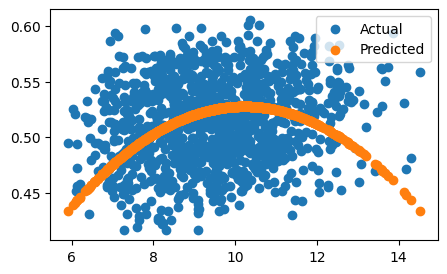

In [ ]:
plt.figure(figsize = (5, 3))
plt.scatter(x2, y2, label = "Actual")
plt.scatter(x2, y2_pred, label = "Predicted")
plt.legend()
plt.show()

# fig = plt.figure()
# axes = fig.add_subplot(111, projection='3d')
# axes.scatter(df2['x1'], df2['x2'], df2['y'], label = "Actual")
# axes.scatter(df2['x1'], df2['x2'], func2(ind_vars, *popt2), label = "Predicted")
# plt.legend()
# plt.show()

###Constants

In [ ]:
Kd = -b2/a2
print(f'Kd = {Kd:.4f}')

Kd = 0.0489


In [ ]:
Ks = a*Kd*psi_1/(b + a*Kd*psi_1)
print(f'Ks = {Ks:.4f}')

Ks = -0.0171


In [ ]:
Mu_max = a2*(1 - Ks)
print(f'Mu_max = {Mu_max:.4f}')

Mu_max = 0.1051


In [ ]:
k = (1 - Ks)/(psi_1*b)
print(f'k = {k:.4f}')

k = 0.0690


In [ ]:
Y = Mu_max/k
print(f'Y = {Y:.4f}')

Y = 1.5217


###Psi_1 Calc

In [ ]:
df['psi_1'] = 2*Ks*df['Q']/(Kd*df['V']*(Mu_max*df['Th_c']*(1 - df['Th_c']*Kd) - 1 + Ks))

df.head(3)

,Unnamed: 0,V,Si,So,TSi,TSo,Ni,No,TKNi,TKNo,...,Q,Th_c,Th,dS,dTS,dN,TKN,Thn,Th_cn,psi_1
0,0,4512.0,239,30,293,18,56,12,150,35,...,2324.09,10.36,8.67,209,275,44,115,2.1675,15.987772,0.750662
1,1,4188.0,280,33,344,15,57,12,159,38,...,2260.14,8.08,8.27,247,329,45,121,2.0675,10.833437,0.749913
2,2,4116.0,256,30,301,14,56,12,139,31,...,2488.85,8.82,7.74,226,287,44,108,1.9350,12.707342,0.863309


#NH4-N Removal Regression 1

In [ ]:
df3 = pd.DataFrame()

df3['y'] = df['V']*df['Sig']*df['M']/(2*df['Q']*df['dN']*df['dTS'])
df3['x1'] = (2*df['Q'])/df['V']
df3['x2'] = 1/df['DO']

df3.head(3)

,y,x1,x2
0,57.584319,1.030182,0.403226
1,50.068640,1.079341,0.309598
2,49.777631,1.209354,0.338983


In [ ]:
y3 = df3['y'].values
x3 = df3.drop(['y'], axis = 1)

x31 = df3['x1'].values
x32 = df3['x2'].values

In [ ]:
df3.corr()

,y,x1,x2
y,1.000000,-0.441199,0.299121
x1,-0.441199,1.000000,0.038699
x2,0.299121,0.038699,1.000000


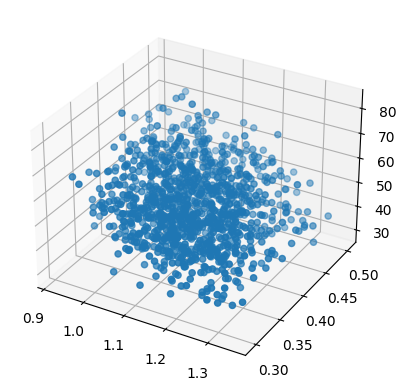

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df3['x1'], df3['x2'], df3['y'])
plt.show()

In [ ]:
def func3(vars, a3, b3, c3):
  x31, x32 = vars
  return (a3*x31 + b3)*(c3*x32 - 1)

In [ ]:
ind_var3 = np.vstack((df3['x1'], df3['x2']))

popt3, pcov3 = curve_fit(func3, ind_var3, df3['y'])

###Equation

In [ ]:
a3 = popt3[0]
b3 = popt3[1]
c3 = popt3[2]

print(f'y = (({a3:.3f}).x1 + ({b3:.3f}))*(({c3:.4f}).x2 - 1)')

y = ((24.300).x1 + (-54.239))*((-2.3815).x2 - 1)


In [ ]:
y3_pred = func3(ind_var3, *popt3)
r2_score(y3, y3_pred)

0.2937949841381159

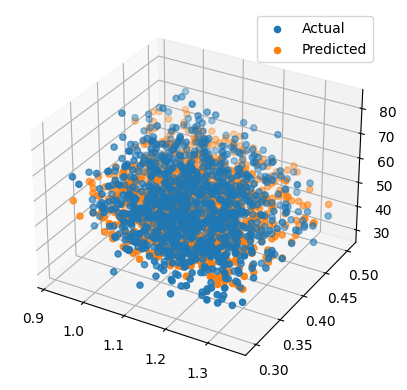

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df3['x1'], df3['x2'], df3['y'], label = "Actual")
axes.scatter(df3['x1'], df3['x2'], func3(ind_var3, a3, b3, c3), label = "Predicted")
plt.legend()
plt.show()

###Constants

In [ ]:
Ko = c3
print(f'Ko = {Ko:.3f}')

Ko = -2.381


In [ ]:
d3 = a3/b3
d3o = a3/(b3*b3)
# Kdn = d*(1 - Kn)*psi_2/Kn
# kn = (1 - Kn)*psi_2/b

#NH4-N Removal Regression 2

In [ ]:
df4 = pd.DataFrame()

df4['x'] = (1 + 2*a3*df['Q']/(b3*df['V']))/(1 + c3/df['DO'])
df4['y'] = 2*df['Th_cn']

df4.head(3)

,x,y
0,13.550934,31.975545
1,1.965809,21.666874
2,2.377373,25.414684


In [ ]:
y4 = df4['y']
x4 = df4.drop(['y'], axis = 1)

In [ ]:
df4.corr()

,x,y
x,1.000000,-0.054487
y,-0.054487,1.000000


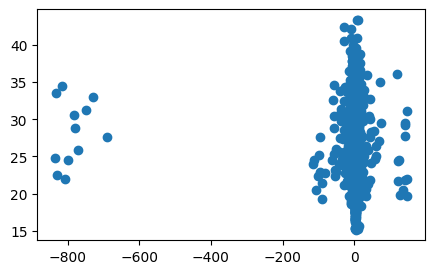

In [ ]:
plt.figure(figsize = (5, 3))
plt.scatter(x4, y4)
plt.show()

In [ ]:
def func4(y, alpha4, beta4):
  return (((beta4*y - 1)**2) + 1)/(4*alpha4)

In [ ]:
popt4, pcov4 = curve_fit(func4, df4['y'], df4['x'], p0 = [1, 1])

alpha4 = popt4[0]
beta4 = popt4[1]

In [ ]:
popt4

array([28.71951288,  0.03331733])

###Equation

In [ ]:
print(f'-1 - 4.({alpha4:.2e}).x = (({beta4:.2e}).y - 1)^2')

-1 - 4.(2.87e+01).x = ((3.33e-02).y - 1)^2


In [ ]:
x4_pred = func4(df4['y'], *popt4)
r24 = r2_score(df4['x'], x4_pred)
r24

-0.004605049264004846

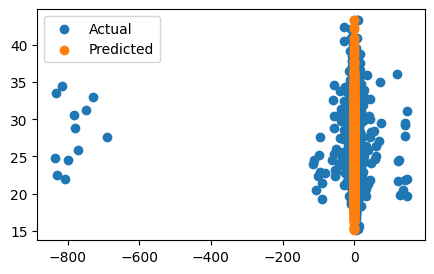

In [ ]:
plt.figure(figsize = (5, 3))
plt.scatter(x4, y4, label = "Actual")
plt.scatter(x4_pred, y4, label = "Predicted")
plt.legend()
plt.show()

###Constants

In [ ]:
psi_2 = 0.2

In [ ]:
Kdn = beta4
print(f'Kdn = {Kdn:.4f}')

Kdn = 0.0333


In [ ]:
kn = 1/(a3*beta4*psi_2*psi_2 + b3*psi_2)
print(f'kn = {kn}')

kn = -0.09246023881855432


In [ ]:
Yn = b3*psi_2*beta4/alpha4
print(f'Yn = {Yn:.3f}')

Yn = -0.013


In [ ]:
Mu_nm = kn*Yn
print(f'Mu_nm = {Mu_nm:.4e}')

Mu_nm = 1.1636e-03


In [ ]:
Kn = 1 - (alpha4*Mu_nm/beta4)
print(f'Kn = {Kn:.4e}')

Kn = -2.9943e-03


###Psi_2 Calc

In [ ]:
df['psi_2'] = 2*Kn*df['Q']/(Kdn*df['V']*(Mu_nm*df['Th_cn']*(1 - Kdn*df['Th_cn'])*(1 + Ko/df['DO']) - 1 + Kn))

df.head(3)

,Unnamed: 0,V,Si,So,TSi,TSo,Ni,No,TKNi,TKNo,...,Th_c,Th,dS,dTS,dN,TKN,Thn,Th_cn,psi_1,psi_2
0,0,4512.0,239,30,293,18,56,12,150,35,...,10.36,8.67,209,275,44,115,2.1675,15.987772,0.750662,0.092340
1,1,4188.0,280,33,344,15,57,12,159,38,...,8.08,8.27,247,329,45,121,2.0675,10.833437,0.749913,0.096918
2,2,4116.0,256,30,301,14,56,12,139,31,...,8.82,7.74,226,287,44,108,1.9350,12.707342,0.863309,0.108541


#Results

####Psi_1

In [ ]:
psi_1 = df['psi_1'].mean()
psi_1_min = df['psi_1'].min()
psi_1_max = df['psi_1'].max()

print(f'psi_1 :\n Range       : ({psi_1_min:.3f}, {psi_1_max:.3f})')
print(f' Mean Value  : {psi_1:.2f}')

psi_1 :
 Range       : (0.603, 0.975)
 Mean Value  : 0.80


####Psi_2

In [ ]:
psi_2 = df['psi_2'].mean()
psi_2_min = df['psi_2'].min()
psi_2_max = df['psi_2'].max()

print(f'psi_2 :\n Range       : ({psi_2_min:.4f}, {psi_2_max:.4f})')
print(f' Mean Value  : {psi_2:.4f}')

psi_2 :
 Range       : (0.0821, 0.1214)
 Mean Value  : 0.1015


####Constants

In [ ]:
print(f'Mu_max = {Mu_max:.1f}')
print(f'Mu_nm = {Mu_nm:.2f}\n')
print(f'Kd = {Kd:.3f}')
print(f'Kdn = {Kdn:.3f}\n')
print(f'Ks = {Ks:.3f}')
print(f'Kn = {Kn:.4f}')

Mu_max = 0.1
Mu_nm = 0.00

Kd = 0.049
Kdn = 0.033

Ks = -0.017
Kn = -0.0030
